# WeatherPy

### Observations and Trends:
- There is an inverse relationship between a city's latitude and temperature. As latitude increases, the temperature decreases.
- The plot for Humidity vs Latitude doesn't show any discernable correleation between latitude and humidity. However, we have to keep in mind the impact that topography and ocean currents have to humidity. Additional data is needed in order to make an accurate assessment. 
- Cities along the equatorial band (-20 to 40) show a pattern of having the greatest measure of cloudiness.  
- There seems to be no observable pattern when trying to correlate wind speed and latitude.


In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-90, 90)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=1200)
lng = np.random.uniform(low=-180, high = 180, size=1200)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

603

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving rikitea, number 0 of 603.
Retrieving aruppukkottai, number 1 of 603.
Retrieving porto walter, number 2 of 603.
Retrieving puerto ayora, number 3 of 603.
Retrieving hilo, number 4 of 603.
Retrieving butaritari, number 5 of 603.
Retrieving labutta, number 6 of 603.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving estelle, number 7 of 603.
Retrieving camacupa, number 8 of 603.
Retrieving sao gabriel da cachoeira, number 9 of 603.
Retrieving isiro, number 10 of 603.
Retrieving sokoni, number 11 of 603.
Retrieving srandakan, number 12 of 603.
Retrieving saint-georges, number 13 of 603.
Retrieving victoria, number 14 of 603.
Retrieving havelock, number 15 of 603.
Retrieving quatre cocos, number 16 of 603.
Retrieving arraial do cabo, number 17 of 603.
Retrieving saleaula, number 18 of 603.
Incomplete record for {'cod': '404', 'message': 'city not

Retrieving tuy hoa, number 163 of 603.
Retrieving antalaha, number 164 of 603.
Retrieving mackay, number 165 of 603.
Retrieving waddan, number 166 of 603.
Retrieving nurota, number 167 of 603.
Retrieving karasburg, number 168 of 603.
Retrieving trincomalee, number 169 of 603.
Retrieving paramonga, number 170 of 603.
Retrieving safaga, number 171 of 603.
Retrieving zhangye, number 172 of 603.
Retrieving crib point, number 173 of 603.
Retrieving bowen, number 174 of 603.
Retrieving nobres, number 175 of 603.
Retrieving warrington, number 176 of 603.
Retrieving fortuna, number 177 of 603.
Retrieving hermanus, number 178 of 603.
Retrieving marawi, number 179 of 603.
Retrieving fontem, number 180 of 603.
Retrieving manavgat, number 181 of 603.
Retrieving itacoatiara, number 182 of 603.
Retrieving jobner, number 183 of 603.
Retrieving morondava, number 184 of 603.
Retrieving devli, number 185 of 603.
Retrieving luang prabang, number 186 of 603.
Retrieving vila velha, number 187 of 603.
Retri

Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving east london, number 336 of 603.
Retrieving mazara del vallo, number 337 of 603.
Retrieving ruatoria, number 338 of 603.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving tanggu, number 339 of 603.
Retrieving guerrero negro, number 340 of 603.
Retrieving japura, number 341 of 603.
Retrieving huarmey, number 342 of 603.
Retrieving broome, number 343 of 603.
Retrieving babanusah, number 344 of 603.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving huanren, number 345 of 603.
Retrieving hobyo, number 346 of 603.
Retrieving port blair, number 347 of 603.
Retrieving chirongui, number 348 of 603.
Retrieving tautira, number 349 of 603.
Retrieving pampa, number 350 of 603.
Retrieving plettenberg bay, num

Retrieving quang ngai, number 506 of 603.
Retrieving sampit, number 507 of 603.
Retrieving kasongo-lunda, number 508 of 603.
Retrieving macas, number 509 of 603.
Retrieving alugan, number 510 of 603.
Retrieving mao, number 511 of 603.
Retrieving stoughton, number 512 of 603.
Retrieving port elizabeth, number 513 of 603.
Retrieving pacific grove, number 514 of 603.
Retrieving mogadishu, number 515 of 603.
Retrieving bafra, number 516 of 603.
Retrieving inongo, number 517 of 603.
Retrieving diffa, number 518 of 603.
Retrieving watsa, number 519 of 603.
Retrieving vao, number 520 of 603.
Retrieving juxtlahuaca, number 521 of 603.
Retrieving sitka, number 522 of 603.
Retrieving torbat-e jam, number 523 of 603.
Retrieving mareeba, number 524 of 603.
Retrieving saint-paul, number 525 of 603.
Retrieving itarema, number 526 of 603.
Retrieving chokwe, number 527 of 603.
Retrieving baniyas, number 528 of 603.
Retrieving qandala, number 529 of 603.
Retrieving asaba, number 530 of 603.
Retrieving 

In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')

# city_data_df.dtypes  -- used to validate dtype; uncomment to test

city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.04,79,16,11.14,PF,2021-06-15 21:56:13
1,Aruppukkottai,9.5167,78.1000,81.72,58,100,14.14,IN,2021-06-15 21:56:14
2,Porto Walter,-8.2686,-72.7439,80.44,65,95,2.51,BR,2021-06-15 21:56:15
3,Puerto Ayora,-0.7393,-90.3518,76.55,83,3,5.01,EC,2021-06-15 21:56:16
4,Hilo,19.7297,-155.0900,79.54,79,69,5.99,US,2021-06-15 21:55:06


### Plotting City Data

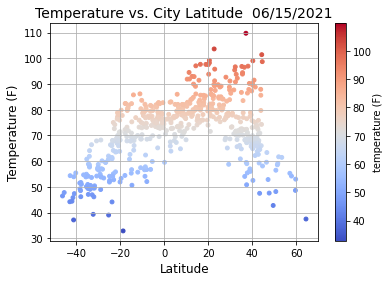

In [6]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

#### Temperature vs City Latitude:
The code is analyzing the relationship between the city latitude and temperature. Data is taken from city_data_df, using 'o' as a marker to plot the City_Lat and Temperature as x,y coordinates. Matpltlib's built in colormap is used to map colors to numbers, where the lowest temperature is blue, and the highest temperature is red. 


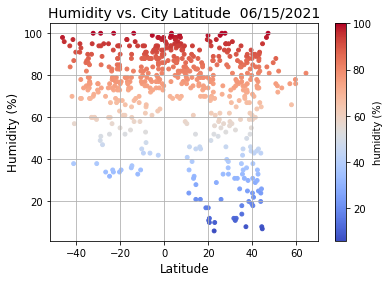

In [7]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("humidity (%)", labelpad=+1)
plt.grid(True) # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

#### Humidity vs City Latitude:
The code is analyzing the relationship between the city latitude and humidity.

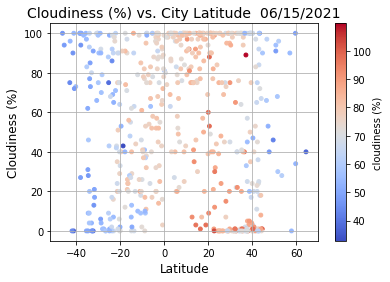

In [8]:
# Plot relationship of Cloudiness (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Cloudiness'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("cloudiness (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

#### Cloudiness vs City Latitude:
The code is analyzing the relationship between the city latitude and cloudiness. 

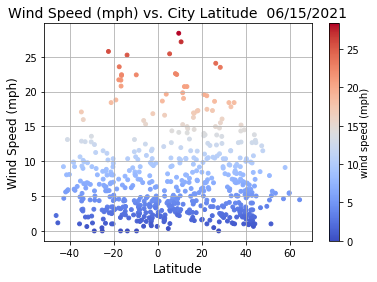

In [9]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("wind speed (mph)", labelpad=+1)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()

#### Wind Speed vs. Latitude
The code is analyzing the relationship between the city latitude and wind speed.

### Linear Regression


In [ ]:
# Northern Hemisphere - Temperature (F) vs. Latitude


In [ ]:
# Southern Hemisphere - Temperature (F) vs. Latitude


In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude


In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude


In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude


In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude


In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude


In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
